In [2]:
%matplotlib inline

from collections import Counter
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import seaborn as sns

In [3]:
all_files = [fname for fname in os.listdir('data') if fname[-4:] == "json"]

In [6]:
# load all events
events = []
for i, fname in enumerate(all_files[:20]):
    if i%10 == 0:
            print i, "out of", len(all_files), "files loaded"
    for line in open(os.path.join("data", fname), 'r'):
        events.append(json.loads(line))

0 out of 504 files loaded
10 out of 504 files loaded


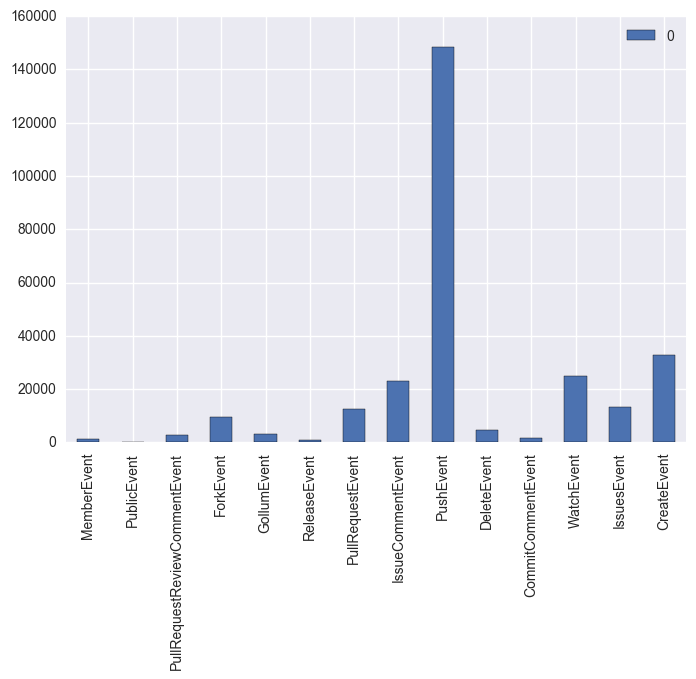

In [41]:
types = [e['type'] for e in events]
type_counts = Counter(types)
df = pd.DataFrame.from_dict(type_counts, orient='index')
df.plot(kind='bar')
plt.show()

In [42]:
actors = [e['actor']['login'] for e in events]
actor_count = Counter(actors)
over5 = np.sum([1 if v >=5 else 0 for v in actor_count.values()])
count_count = Counter(actor_count.values())

280186 75155 15582


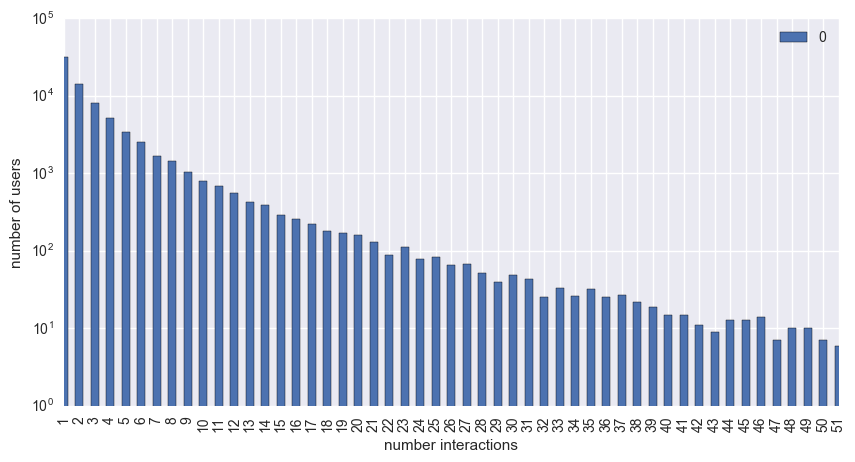

In [62]:
print len(actors), len(set(actors)), over5
df = pd.DataFrame.from_dict(count_count, orient='index')

df.plot(kind='bar', logy=True, figsize=(10,5))
plt.xlabel("number interactions")
plt.ylabel("number of users")
plt.xlim([0,50])
plt.show()

## Calculate common keys between all events

In [57]:
common_set = set(events[0].keys())
for i in range(1000):
    common_set = common_set & set(events[i].keys())
common_set

{u'actor', u'created_at', u'id', u'payload', u'public', u'repo', u'type'}

## Look into number of repos

In [65]:
repos = [e['repo']['name'] for e in events]
repo_count = Counter(repos)
df = pd.DataFrame.from_dict(repo_count, orient='index')
over5repos = np.sum([1 if v >=5 else 0 for v in repo_count.values()])
print len(repos), len(set(repos)), over5repos


280186 83777 13934


In [80]:
print len(df[df[0]>100]), "with over 100 commits in the files"
df[df[0]>100].sort_values(0, ascending=False).head(15)

71 with over 100 commits in the files


,0
KenanSulayman/heartbeat,1563
sakai-mirror/melete,600
qdm/qdm.github.io,581
dspinellis/unix-history-repo,501
rust-lang/rust,419
rdpeng/ExData_Plotting1,373
jtleek/datasharing,323
prakhar1989/awesome-courses,314
BLooperZ/blooperz.github.io,274
greatfire/wiki,250


In [68]:
df

,0
Tener/spike,1
emcrisostomo/fswatch,1
evilC/UCR,3
mozilla/sugardough,3
bohni/maxdocs,2
myfossil/WordPress,13
dimitrismistriotis/dotfiles,2
strack/RapidMeteor,2
johnno1962/SwiftRegex,1
tpope/hookup,1
